## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza 🍕 & steak 🥩) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

## Importing nessacary Libraries

In [ ]:
# Frameworks for building the model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set()

import tensorflow as tf

In [ ]:
# Frameworks for assist the model
import os
import pathlib
import zipfile
import random

## 1.Import the dataset

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-01-15 23:06:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 2a00:1450:4013:c14::80, 2a00:1450:4013:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  41.3MB/s    in 12s     

2023-01-15 23:07:10 (41.0 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# Unzip data
zip_ref = zipfile.ZipFile("/content/10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# Walk through the 10 class image data
for file_path, file_dir, files in os.walk("10_food_classes_all_data"):
  print(f"There are {len(files)} files & {len(file_dir)} directories in `{file_path}``.")

There are 0 files & 2 directories in `10_food_classes_all_data``.
There are 0 files & 10 directories in `10_food_classes_all_data/test``.
There are 250 files & 0 directories in `10_food_classes_all_data/test/sushi``.
There are 250 files & 0 directories in `10_food_classes_all_data/test/ice_cream``.
There are 250 files & 0 directories in `10_food_classes_all_data/test/hamburger``.
There are 250 files & 0 directories in `10_food_classes_all_data/test/pizza``.
There are 250 files & 0 directories in `10_food_classes_all_data/test/chicken_wings``.
There are 250 files & 0 directories in `10_food_classes_all_data/test/grilled_salmon``.
There are 250 files & 0 directories in `10_food_classes_all_data/test/fried_rice``.
There are 250 files & 0 directories in `10_food_classes_all_data/test/ramen``.
There are 250 files & 0 directories in `10_food_classes_all_data/test/steak``.
There are 250 files & 0 directories in `10_food_classes_all_data/test/chicken_curry``.
There are 0 files & 10 directories

In [ ]:
# Setup train & test data directories
train_dir = "/content/10_food_classes_all_data/train/"
test_dir = "/content/10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names
data_dir = pathlib.Path(train_dir) 
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Let's visualize our images
def  view_random_img(target_dir, target_class):
  # Setup the target path
   target_folder = target_dir + target_class

   random_img = random.sample(os.listdir(target_folder),1)
   

   img = mpimg.imread(target_folder +"/"+ random_img[0])
   plt.imshow(img)
   plt.title(target_class)
   plt.axis("off");

   print(f"Image Shape: {img.shape}")
   #print(random_img)

   return img

Image Shape: (512, 512, 3)


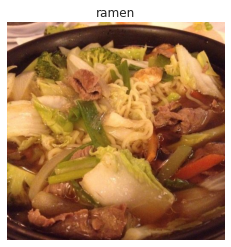

In [ ]:
img = view_random_img(train_dir, "ramen")

## 2.Preprocess the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Rescale the data
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load data from the directory and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3.Create the model (start with baseline)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

In [ ]:
#set seed
tf.random.set_seed(42)

# Build the model
model_1 = Sequential([
    Conv2D(filters=10, kernel_size=(3,3), input_shape=(224,224,3), activation="relu"),
    Conv2D(filters=10, kernel_size=(3,3), activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
], name="Food_101_Classification_model_1")

# Compile the model
model_1.compile(loss = "categorical_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

## 4.Fit the model

In [ ]:
meta_1 = model_1.fit(train_data,
            epochs=5,
            steps_per_epoch = (len(train_data)),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 59s 208ms/step - loss: 2.1303 - accuracy: 0.2253 - val_loss: 1.9765 - val_accuracy: 0.2964
Epoch 2/5
235/235 [==============================] - 47s 202ms/step - loss: 1.8684 - accuracy: 0.3535 - val_loss: 1.8925 - val_accuracy: 0.3356
Epoch 3/5
235/235 [==============================] - 47s 201ms/step - loss: 1.4395 - accuracy: 0.5197 - val_loss: 2.0882 - val_accuracy: 0.3324
Epoch 4/5
235/235 [==============================] - 48s 205ms/step - loss: 0.8687 - accuracy: 0.7124 - val_loss: 2.5081 - val_accuracy: 0.3096
Epoch 5/5
235/235 [==============================] - 47s 200ms/step - loss: 0.3739 - accuracy: 0.8800 - val_loss: 3.6956 - val_accuracy: 0.2656


In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 11s 142ms/step - loss: 3.6956 - accuracy: 0.2656


[3.695591688156128, 0.2655999958515167]

## 5.Evaluvate the model

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curve(meta):

  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))

  loss = meta.history["loss"]
  accuracy = meta.history["accuracy"]

  val_loss = meta.history["val_loss"]
  val_accuracy = meta.history["val_accuracy"]

  epochs = range(len(meta.history["loss"]))

  sns.lineplot(data=meta.history, y=loss, x=epochs, label="loss", ax=ax1)
  sns.lineplot(data=meta.history, y=val_loss, x=epochs, label="val_loss", ax=ax1).set(title="Loss Curve", xlabel="epochs")
  ax1.grid(False)
  ax1.legend(loc="upper right");
 

  sns.lineplot(data=meta.history, y=accuracy, x=epochs, label="accuracy", ax=ax2)
  sns.lineplot(data=meta.history, y=val_accuracy, x=epochs, label="val_accuracy", ax=ax2).set(title="Accuracy Curve", xlabel="epochs")
  ax2.grid(False)
  ax2.legend(loc="lower right");


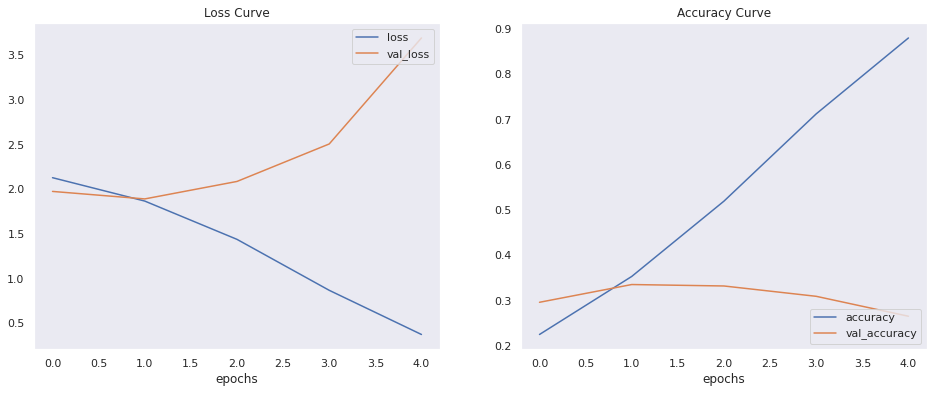

In [ ]:
plot_loss_curve(meta_1)


Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training daa but fails to generalize well to unseen data and performs poorly on the test dataset.

## 6.Adjust the model hyper-parameters


Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to reduce no.of layers or reduce hidden units in layers
* **Use data augmentation** - data augmentaiton manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset 

In [ ]:
#set seed
tf.random.set_seed(42)

# Build the model
model_2 = Sequential([
    Conv2D(filters=10, kernel_size=(3,3), input_shape=(224,224,3), activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
], name="Food_101_Classification_model_2")

# Compile the model
model_2.compile(loss = "categorical_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

In [ ]:
meta_2 = model_2.fit(train_data,
            epochs=5,
            steps_per_epoch = (len(train_data)),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 47s 197ms/step - loss: 2.1211 - accuracy: 0.2412 - val_loss: 1.9556 - val_accuracy: 0.2956
Epoch 2/5
235/235 [==============================] - 44s 189ms/step - loss: 1.8150 - accuracy: 0.3800 - val_loss: 1.8876 - val_accuracy: 0.3400
Epoch 3/5
235/235 [==============================] - 45s 191ms/step - loss: 1.4548 - accuracy: 0.5244 - val_loss: 1.9186 - val_accuracy: 0.3564
Epoch 4/5
235/235 [==============================] - 46s 194ms/step - loss: 0.9589 - accuracy: 0.7015 - val_loss: 2.0964 - val_accuracy: 0.3268
Epoch 5/5
235/235 [==============================] - 45s 190ms/step - loss: 0.5298 - accuracy: 0.8513 - val_loss: 2.5129 - val_accuracy: 0.3192


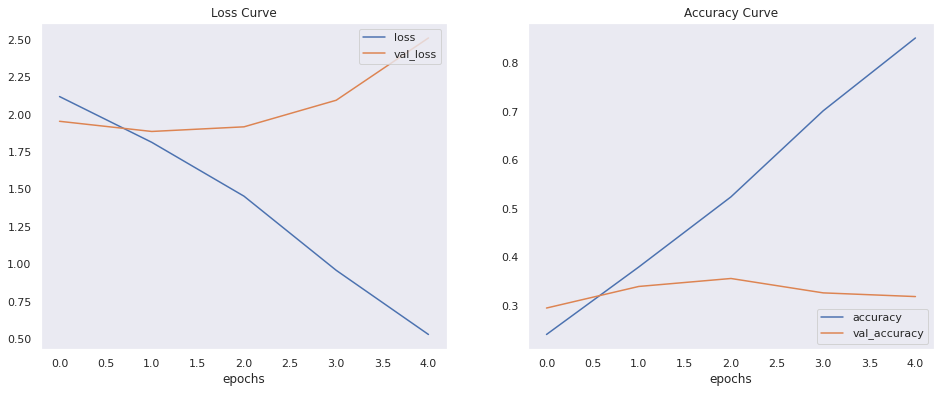

In [ ]:
plot_loss_curve(meta_2)

In [ ]:
model_2.summary()

Model: "Food_101_Classification_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None,

Looks like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued...

How about we try data augmentation??

### Trying to reduce overfitting with data augmentation



Let's try and improve our model's results by using augmented training data... 

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [ ]:
# Create a augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)


train_data_augmented = train_datagen.flow_from_directory(directory=train_dir,
                                                            target_size=(224,224),
                                                            class_mode="categorical",
                                                            batch_size=32)

Found 7500 images belonging to 10 classes.


In [ ]:
model_3 = tf.keras.models.clone_model(model_1)

model_3.compile( loss = "categorical_crossentropy",
                 optimizer = "Adam",
                 metrics=["accuracy"])

In [ ]:
meta_3 = model_3.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch = (len(train_data_augmented)),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 56s 234ms/step - loss: 2.1956 - accuracy: 0.1847 - val_loss: 2.0926 - val_accuracy: 0.2364
Epoch 2/5
235/235 [==============================] - 48s 204ms/step - loss: 1.9983 - accuracy: 0.2899 - val_loss: 1.9761 - val_accuracy: 0.3092
Epoch 3/5
235/235 [==============================] - 47s 200ms/step - loss: 1.7670 - accuracy: 0.3936 - val_loss: 1.8332 - val_accuracy: 0.3560
Epoch 4/5
235/235 [==============================] - 48s 203ms/step - loss: 1.3096 - accuracy: 0.5612 - val_loss: 1.9814 - val_accuracy: 0.3404
Epoch 5/5
235/235 [==============================] - 47s 198ms/step - loss: 0.6861 - accuracy: 0.7815 - val_loss: 2.7580 - val_accuracy: 0.2920


In [ ]:
model_3.summary()

Model: "Food_101_Classification_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                               

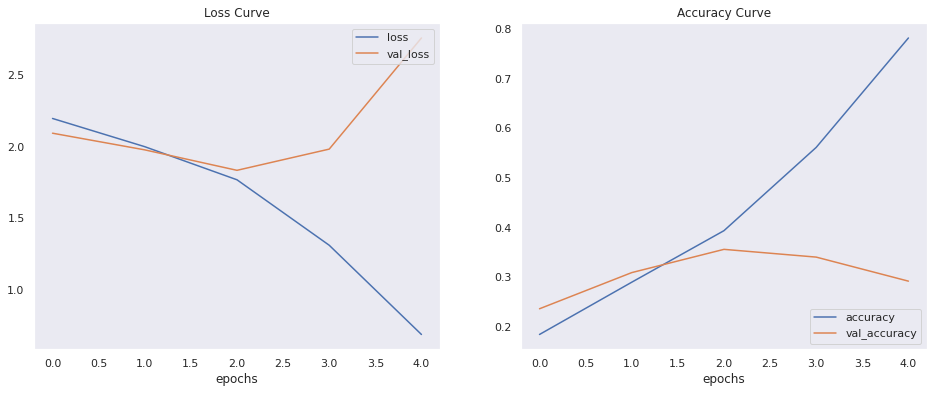

In [ ]:
plot_loss_curve(meta_3)

## 7.Repeat until satisfied

We could keep going here... continally trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiemtns, namely:
- restructuring our model's architecture (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**

## Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images!

In [ ]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-01-15 23:25:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2023-01-15 23:25:46 (118 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2023-01-15 23:25:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting 

In [ ]:
list(class_names)

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [33]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it 
  to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [35]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 186ms/step


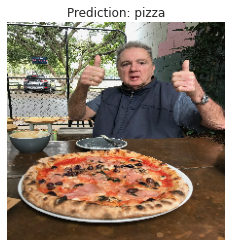

In [37]:
pred_and_plot(model=model_3, filename="/content/03-pizza-dad.jpeg")

1/1 [==============================] - 0s 24ms/step


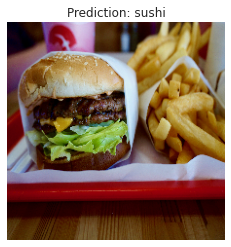

In [38]:
pred_and_plot(model=model_3, filename="/content/03-hamburger.jpeg")

1/1 [==============================] - 0s 17ms/step


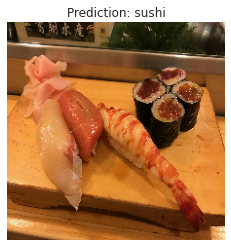

In [39]:
pred_and_plot(model=model_3, filename="/content/03-sushi.jpeg")

1/1 [==============================] - 0s 25ms/step


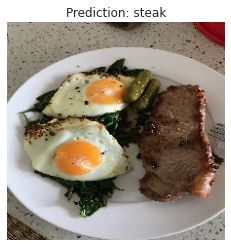

In [40]:
pred_and_plot(model=model_3, filename="/content/03-steak.jpeg")

## Saving & loading our model

In [41]:
# saving the model
model_3.save("Food_101_model")

In [42]:
# loading the saved model
loaded_model = tf.keras.models.load_model("Food_101_model")

In [43]:
# Checking the wrking status of the model
loaded_model.evaluate(test_data)

79/79 [==============================] - 11s 142ms/step - loss: 2.7580 - accuracy: 0.2920


[2.758042573928833, 0.2919999957084656]

In [44]:
#compare the current model with the loaded model
model_3.evaluate(test_data)

79/79 [==============================] - 12s 151ms/step - loss: 2.7580 - accuracy: 0.2920


[2.758042097091675, 0.2919999957084656]